In [ ]:
import pandas as pd
from pandas.plotting import parallel_coordinates
import numpy as np
import pickle
import os

from matplotlib import pyplot as plt
from matplotlib import rc, font_manager

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
#한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (43.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falli

In [ ]:
def df_to_line_graph(df,tit):
    # 한글깨짐 방지
    plt.rc('font', family='NanumBarunGothic')  #matplot에서 rc함수로 폰트변경 및 한글 깨짐 방지 
    plt.rcParams['axes.unicode_minus'] = False  # - 기호 깨짐 방지 
    
    # 캔버스생성
    fig = plt.figure(figsize=(15, 10)) # 캔버스 생성 / 그래프 사이즈 -> 가로 : 15, 세로 : 10
    fig.set_facecolor('white') # 캔버스 색상 설정(그래프 뒷 배경 색)
    
    # 그림 뼈대(프레임) 생성
    ax = fig.add_subplot()    #plt.subplot 의 입력값은 행의수, 열의수, index 순 -> 그림 뼈대를 ax변수에 담음
    ax.set_xlabel("날짜") 
    ax.set_ylabel("2019-01-01이 100일때")
    
    # x축 눈금설정
    size=len(df) #df의 길이만큼 x축 길이 설정
    a=size//12 # 이건 뭘 의미하는거지?
    ax.set_xticks([12*i for i in range(a)]) # 눈금 범위 설정 
    
    # 데이터추가
    cols=df.columns # 변수의 행을 cols로 추가 
    for col in cols:
        ax.plot(df[col],label=col) ## 선그래프 생성 

    plt.legend() #범례
    plt.xticks(rotation=90) # x축 각도회전
    plt.title(tit,fontsize=20) # 타이틀설정
    
    plt.grid()
    
    plt.show()
    
    
def L_to_pie(L,cols,t):  #파이차트
    plt.title(t) #타이틀
    plt.pie(L, labels=cols, autopct='%.0f%%') #설정
    plt.show()
    
def returnName(s): #이름 추출 함수
    indx=s.index("[") # [가 있는 위치의 값을 indx로 담음
    return s[:indx] # [ 전까지 있는 데이터를 슬라이싱으로 추출

def cumulate_bar(df): #막대그래프 
    exceptL=["전국[호]","수도권[호]"]
    cols=[col for col in df.columns if col not in exceptL] # 잘모르겠음 

    size=len(cols)
    lastSize=12

    a=[np.array(df[col][-1*lastSize:]) for col in cols]

    # 캔버스생성
    fig = plt.figure(figsize=(20, 10))
    
    # x축생성
    X=df.index[-1*lastSize:] 
    
    myBar=[]
    # 막대그리기
    myBar.append(plt.bar(X,a[0]))
    for i in range(1,size):
        myBar.append(plt.bar(X,a[i],bottom=sum(a[:i])))
    
    # 기타
    ax = fig.add_subplot() 
    ax.set_xlabel("날짜",fontsize=18)
    ax.set_ylabel("미분양주택(호)",fontsize=18)
    plt.title("최근 1년간 미분양주택현황",fontsize=25)

    cols=list(map(returnName,cols))
    plt.legend(myBar,cols)
    plt.show()
    
def df_to_pie(df,d):
    cols=df.columns
    exceptL=["전국[호]","수도권[호]"]
    
    cols=[col for col in df.columns if col not in exceptL]
    ratio=df.loc[d,cols]
    labels=list(map(returnName,cols))
    size=len(ratio)
    
    explode=[0.15 for i in range(size)]
        
    plt.title(d+" 미분양주택현황") #타이틀
    plt.pie(ratio, labels=labels, autopct='%.0f%%', explode=explode) #설정
    plt.show()

In [ ]:
#주택매매 가격

house_price = pd.read_csv("주택매매가격지수(KB).csv")
house_price.set_index("Unnamed: 0", inplace=True)
house_price_df=house_price.iloc[:,:4] # 모든 행에 대해 4번째 열까지 추출 
house_price_df.columns = ["총지수", "단독주택", "연립주택", "아파트"] #.columns 함수 : 변수이름 변환

display(house_price_df)

,총지수,단독주택,연립주택,아파트
Unnamed: 0,,,,
1986-01-01,34.656,61.347,43.053,20.973
1986-02-01,34.656,61.347,42.925,20.973
1986-03-01,34.708,61.513,42.733,20.935
1986-04-01,34.449,61.097,42.733,20.819
1986-05-01,34.293,60.848,41.837,20.664
...,...,...,...,...
2020-11-01,107.125,104.334,106.398,107.506
2020-12-01,108.586,104.909,107.237,109.346
2021-01-01,109.878,105.303,107.895,111.005


##시각화1

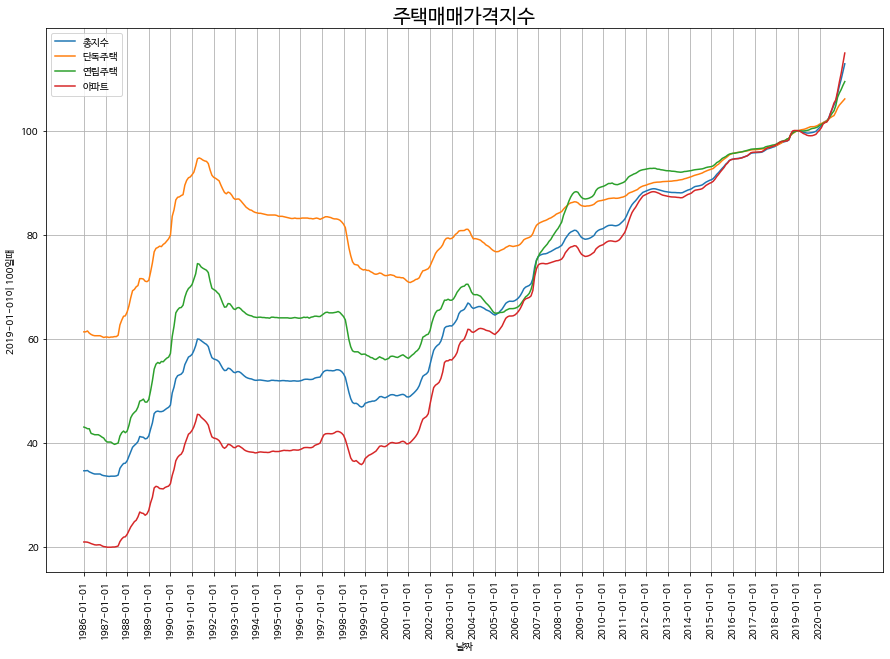

In [ ]:
df_to_line_graph(house_price_df, "주택매매가격지수")

In [ ]:
#주택전세가격

jonse_price = pd.read_csv("주택전세가격지수(KB).csv")
jonse_price.set_index("Unnamed: 0", inplace=True)
jonse_price_df = jonse_price.iloc[:, :4]
jonse_price_df.columns = ["총지수", "단독주택", "연립주택", "아파트"]

In [ ]:
display(jonse_price_df)

,총지수,단독주택,연립주택,아파트
Unnamed: 0,,,,
1986-01-01,17.601,35.506,18.059,10.793
1986-02-01,17.853,35.731,18.155,11.104
1986-03-01,18.273,36.553,18.823,11.446
1986-04-01,18.651,37.151,19.158,11.695
1986-05-01,18.693,37.151,19.301,11.726
...,...,...,...,...
2020-11-01,104.886,102.823,105.011,105.140
2020-12-01,106.043,103.249,105.711,106.608
2021-01-01,106.925,103.545,106.306,107.688


##시각화2

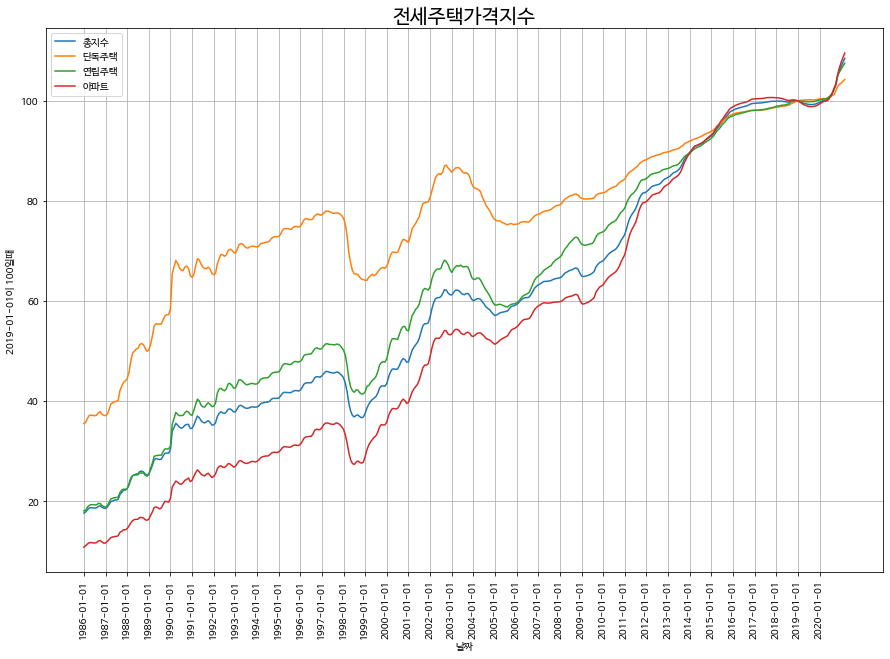

In [ ]:
df_to_line_graph(jonse_price_df, "전세주택가격지수")

In [ ]:
#동시 시각화 => 주택매매가격 & 주택전세가격 동시에 시각화

house_price_df.columns = ["총지수", "단독주택", "연립주택", "아파트"]
jonse_price_df.columns = ["총지수(전세)", "단독주택(전세)", "연립주택(전세)", "아파트(전세)"]
total_df = pd.concat([house_price_df, jonse_price_df], axis=1) # pd.concat함수 : 데이터 프레임 합칠 때 사용 / aixs = 0 행 병합, axis = 1 열기준으로 세로로 병합

In [ ]:
total_df.head(10)

,총지수,단독주택,연립주택,아파트,총지수(전세),단독주택(전세),연립주택(전세),아파트(전세)
Unnamed: 0,,,,,,,,
1986-01-01,34.656,61.347,43.053,20.973,17.601,35.506,18.059,10.793
1986-02-01,34.656,61.347,42.925,20.973,17.853,35.731,18.155,11.104
1986-03-01,34.708,61.513,42.733,20.935,18.273,36.553,18.823,11.446
1986-04-01,34.449,61.097,42.733,20.819,18.651,37.151,19.158,11.695
1986-05-01,34.293,60.848,41.837,20.664,18.693,37.151,19.301,11.726
1986-06-01,34.137,60.682,41.709,20.548,18.651,37.151,19.301,11.664
1986-07-01,34.034,60.599,41.581,20.432,18.609,37.076,19.253,11.633
1986-08-01,34.034,60.599,41.581,20.394,18.651,37.151,19.253,11.726
1986-09-01,34.034,60.599,41.581,20.432,18.945,37.599,19.540,12.037


##시각화3

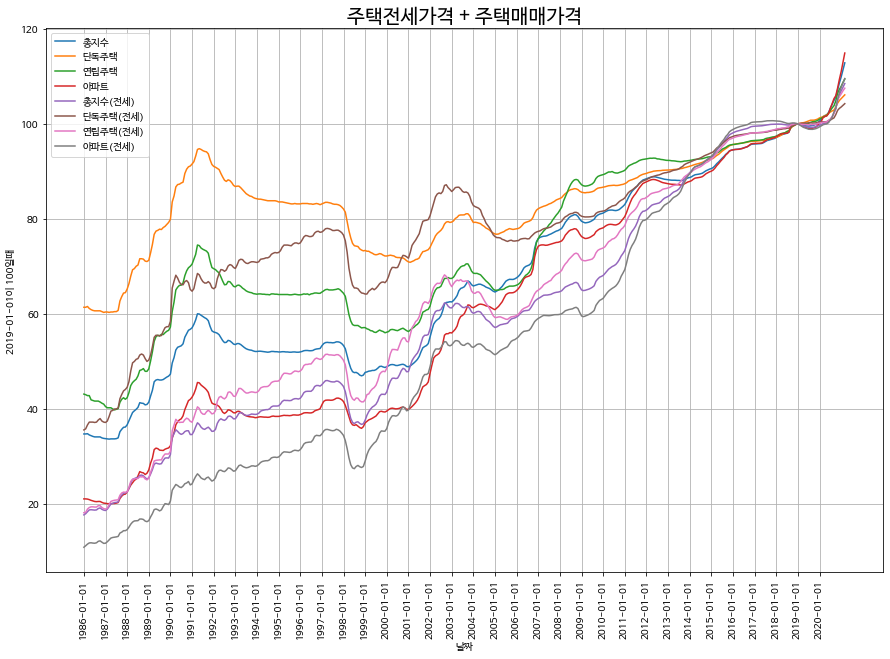

In [ ]:
df_to_line_graph(total_df, "주택전세가격 + 주택매매가격")

In [ ]:
#미분양주택현황 시각화

In [ ]:
#지역별 시간에 따른 미분양 주택 현황

unsold_df = pd.read_csv("미분양주택현황.csv")
unsold_df.set_index("Unnamed: 0", inplace=True)
display(unsold_df)

,전국[호],서울[호],부산[호],대구[호],인천[호],광주[호],대전[호],울산[호],경기[호],강원[호],충북[호],충남[호],전북[호],전남[호],경북[호],경남[호],제주[호],수도권[호],세종[호]
Unnamed: 0,,,,,,,,,,,,,,,,,,,
2007-01-01,75616.0,697.0,8680.0,9467.0,243.0,7005.0,819.0,1180.0,3604.0,5312.0,2548.0,7449.0,5179.0,5374.0,6210.0,11772.0,77.0,4544.0,NaN
2007-02-01,73619.0,590.0,8653.0,9134.0,312.0,6246.0,803.0,1210.0,3361.0,5344.0,2645.0,7363.0,5098.0,5253.0,5948.0,11563.0,96.0,4263.0,NaN
2007-03-01,73162.0,687.0,8548.0,9189.0,266.0,5905.0,1048.0,1687.0,2579.0,5801.0,2565.0,7446.0,5184.0,4887.0,5854.0,11328.0,188.0,3532.0,NaN
2007-04-01,73393.0,685.0,8074.0,9009.0,219.0,5829.0,1020.0,1521.0,2488.0,5460.0,3632.0,8250.0,4812.0,4664.0,5419.0,12149.0,162.0,3392.0,NaN
2007-05-01,78571.0,704.0,7964.0,10888.0,362.0,7842.0,957.0,1500.0,2488.0,5212.0,4012.0,9195.0,4625.0,4640.0,6303.0,11723.0,156.0,3554.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,26703.0,52.0,1262.0,1143.0,822.0,245.0,832.0,474.0,2733.0,2884.0,307.0,3235.0,444.0,1073.0,2922.0,7042.0,1233.0,3607.0,0.0
2020-11-01,23620.0,52.0,1084.0,667.0,691.0,88.0,831.0,473.0,2440.0,2648.0,275.0,3582.0,400.0,1059.0,2541.0,5581.0,1208.0,3183.0,0.0
2020-12-01,19005.0,49.0,973.0,280.0,466.0,31.0,638.0,468.0,1616.0,3115.0,273.0,2510.0,661.0,1059.0,2154.0,3617.0,1095.0,2131.0,0.0


##시각화4

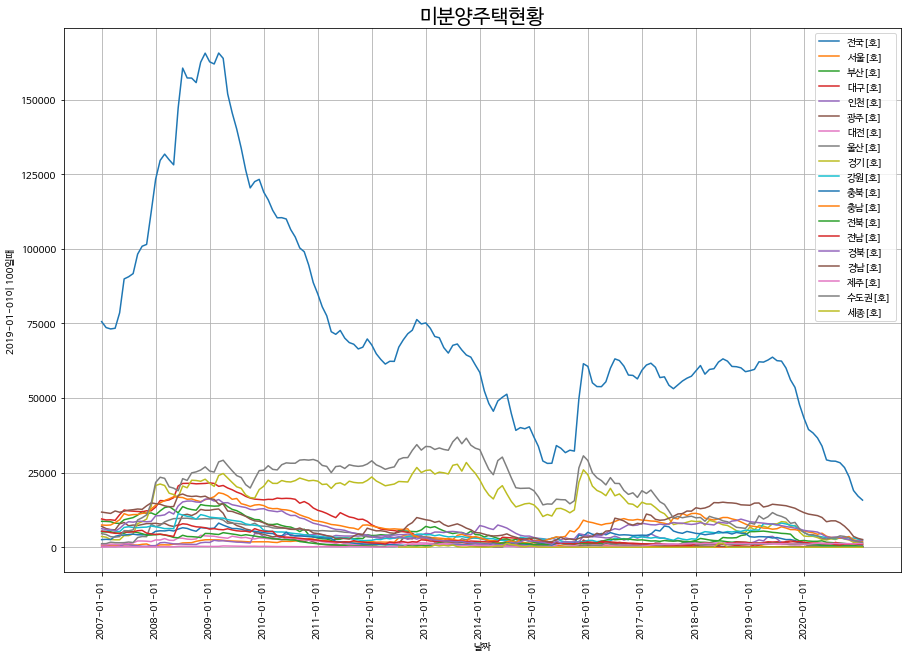

In [ ]:
df_to_line_graph(unsold_df, "미분양주택현황")

##시각화5

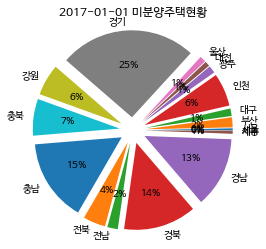

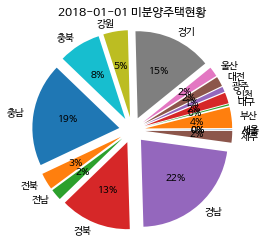

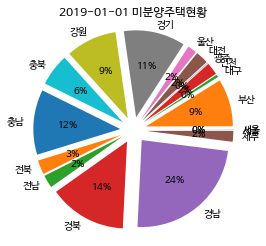

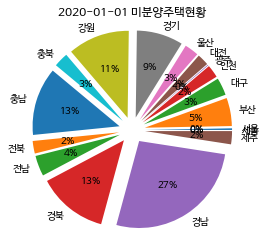

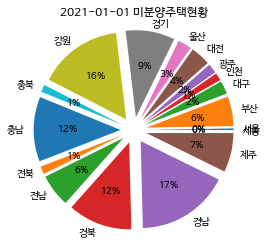

In [ ]:
#최근 5년간 지역별 미분양주택현황 비율

for i in range(5):
  year = 2017 + i
  df_to_pie(unsold_df.loc[[str(year) + "-01-01"]], str(year) + "-01-01") # 2017~2022년도 01월 01일 행 추출 

##시각화6

In [ ]:
def df_to_pie(df,d):
    cols=df.columns
    exceptL=["전국[호]","수도권[호]"] #예외시킬 행 목록
    
    cols=[col for col in df.columns if col not in exceptL] # 년도별 행 추출하는데 exceptL에 담긴 이름의 변수는 제거해 추출
    ratio=df.loc[d,cols] # 년도별 cols에서 추출한 변수에서 01월 01일에 해당하는 값을 loc 행기반으로 추출 = 변수에 해당하는 값도 같이 출력 
    labels=list(map(returnName,cols))
    size=len(ratio)
    
    explode=[0.15 for i in range(size)]
        
    plt.title(d+" 미분양주택현황") #타이틀
    plt.pie(ratio, labels=labels, autopct='%.0f%%', explode=explode) #설정
    plt.show()

서울[호]      49.0
부산[호]     944.0
대구[호]     419.0
인천[호]     245.0
광주[호]     307.0
대전[호]     635.0
울산[호]     438.0
경기[호]    1567.0
강원[호]    2671.0
충북[호]     234.0
충남[호]    2061.0
전북[호]     251.0
전남[호]    1046.0
경북[호]    2049.0
경남[호]    2964.0
제주[호]    1250.0
세종[호]       0.0
Name: 2021-01-01, dtype: float64

['서울', '부산', '대구', '인천', '광주', '대전', '울산', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주', '세종']
17
[0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15]


([<matplotlib.patches.Wedge at 0x7f320cedb2d0>,
 [Text(1.249949527566621, 0.011232921969845022, '서울'),
  Text(1.2272449197052742, 0.23742347621411772, '부산'),
  Text(1.1303692049818794, 0.5336342009547687, '대구'),
  Text(1.0571750742922406, 0.6669938997436152, '인천'),
  Text(0.9843544416594296, 0.770419582555735, '광주'),
  Text(0.8372647233949619, 0.9281636617312478, '대전'),
  Text(0.6396334498823341, 1.0739502082459986, '울산'),
  Text(0.21081133516546868, 1.2320951996358693, '경기'),
  Text(-0.7138060198110314, 1.0261486081857412, '강원'),
  Text(-1.1360770501733772, 0.5213721665656483, '충북'),
  Text(-1.2499453230528978, 0.011691423274661088, '충남'),
  Text(-1.1440662505196362, -0.5035994583217311, '전북'),
  Text(-0.9931899899237265, -0.7589951540789363, '전남'),
  Text(-0.42939163644394834, -1.1739347607733526, '경북'),
  Text(0.673186609732748, -1.0532425117115853, '경남'),
  Text(1.217297389912967, -0.2840546857756062, '제주'),
  Text(1.249999999999999, -5.485942841750405e-08, '세종')],
 [Text(0.7499697

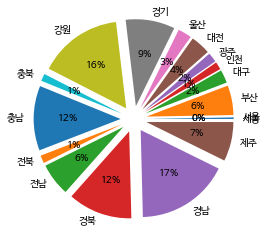

In [ ]:
exceptL=["전국[호]", "수도권[호]"]
year = 2021
cols = [col for col in unsold_df.loc[[str(year) + "-01-01"]].columns if col not in exceptL]
ratio = unsold_df.loc[[str(year) + "-01-01"]].loc[str(year) + "-01-01", cols] 
display(ratio)
labels=list(map(returnName, cols)) #map함수 : retrunName함수를 통해 받은 값을 리스트 형태인 cols 변수에 담아 리스트로 출력 
print(labels)
size=len(ratio)
print(size)
expode=[0.15 for i in range(size)]
print(expode)
plt.pie(ratio, labels=labels, autopct='%.0f%%', explode=expode) #autopct는 영역 비율 퍼센트를 표시할 포맷팅 형태 -> %.0f%% = 소숫점 자리 없앰을 의미
#explode 옵션 : 파이조각이 돌출되는 크기. 0이면 돌출 되지 않음 

##시각화7

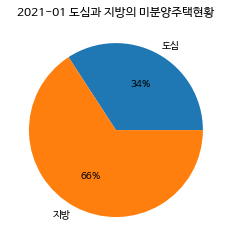

In [ ]:
# 도심과 지방의 미분양주택 비율

city = ["서울", "부산", "대구", "인천", "광주", "대전", "울산", "경기", "세종", "제주"]
countryL = ["강원", "충북", "충남", "전북", "전남", "경북", "경남"]

L= [sum([unsold_df.iloc[-2][col + "[호]"] for col in city]), sum([unsold_df.iloc[-2][col+'[호]'] for col in countryL])] # 뒤에서 -2번째 행을 기준으로 city, cityL에 대응되는 값을 추출해 sum을 취해 리스트에 2개의 값을 담음

L_to_pie(L, ["도심", "지방"], "2021-01 도심과 지방의 미분양주택현황")
#display(unsold_df)

##시각화8

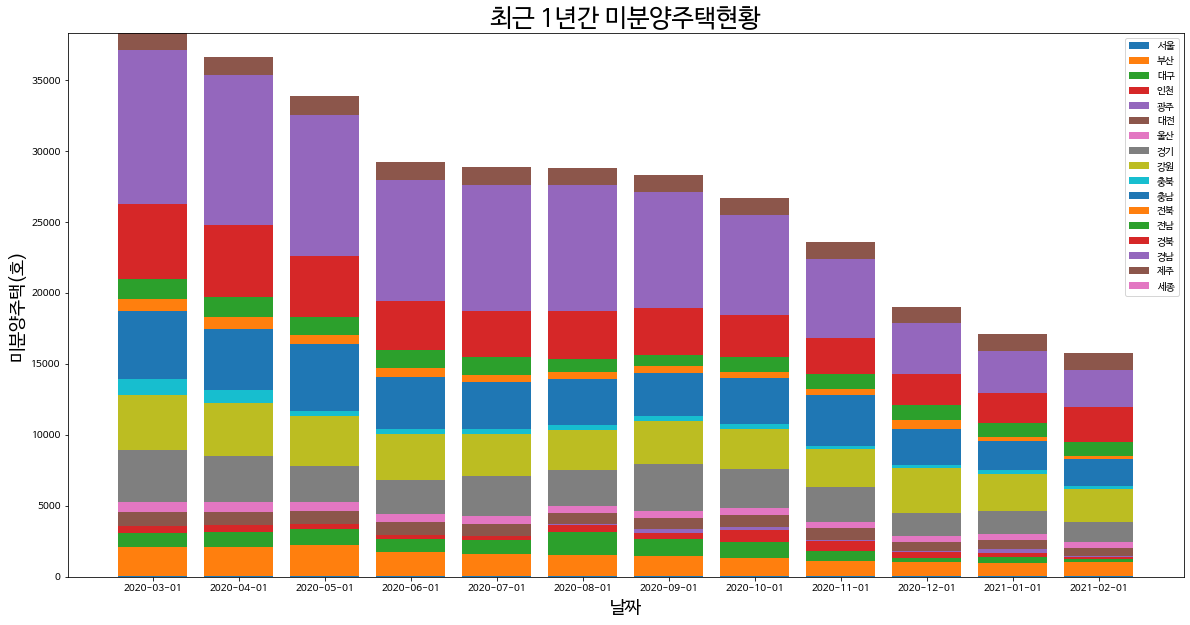

In [ ]:
#최근 1년간 지역별 미분양 주택현황 수(월단위)

cumulate_bar(unsold_df)
